In [1]:
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")
dataset
dataset=pd.get_dummies(dataset,drop_first=True)
dataset
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [2]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [3]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [4]:
dependent=dataset[['charges']]

In [5]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor=regressor.fit(X_train,y_train)

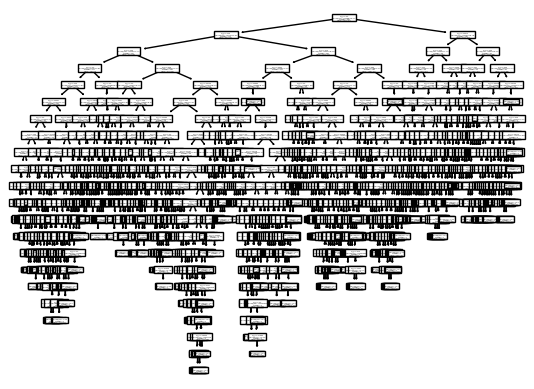

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [9]:
y_pred=regressor.predict(X_test)

In [10]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [11]:
r_score

0.694851440710978

In [12]:
import pickle
filename="finalized_model_decisiontree.sav"
pickle.dump(regressor,open(filename,'wb'))

In [14]:
loaded_model=pickle.load(open("finalized_model_decisiontree.sav",'rb'))
result=loaded_model.predict([[40, 2, 40.5, 1, 2,]])

/Users/harikrishnan/Documents/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [15]:
result

array([32734.1863])